In [45]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("survminer")
library(survminer)
install.packages("survival")
library(survival)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
# Leer el archivo CSV desde la URL
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_FOTL1.csv"
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv(url, show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [49]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100312   Length:56606       Length:56606       Length:56606      
 1st Qu.:1027202   Class :character   Class :character   Class :character  
 Median :1087545   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1020684                                                           
 3rd Qu.:1152337                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:56606       Length:56606       Length:56606       Length:56606      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [50]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,action_code,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1083217,JOIN PANEL,Calibration,FD62,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,SEWA001,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Antony Ulloa,1/3/2023,1.00,1.00,0.00,$46.77,1,0.00
1083217,JOIN PANEL,Corrective Maintenance,FD62,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC013,Misadjusted machine head looper / Enlazador de cabezal desajustado,SEWA012,Adjust machine head looper / Ajustar enlazador de cabezal,Omar Maldonado,1/3/2023,2.25,2.25,0.00,$0.00,1,1.25
1083219,FLAT LOCK,Breakdown,FD62,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,SEWA001,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Jose Manuel Perez Zepeda,6/10/2024,1.00,0.92,0.08,$0.00,1,0.00
1083221,JOIN PANEL,Corrective Maintenance,FD62,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC018,Misadjusted machine head presser foot / Prensatela de cabezal desajustado,SEWA015,Adjusted machine head presser foot / Ajustar prensatela de cabezal,Erick Garcia Lima,3/6/2024,1.25,1.17,0.08,$0.00,1,0.25
1083224,FLAT SEAM,Calibration,FD62,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC134,Damaged folder guide / Guía de doblillador en mal estado,SEWA126,Replace folder base / Reemplazar base del doblillador,Ronald Antonio Herrera,4/19/2023,1.00,1.00,0.00,$44.02,1,0.00


**ANALISIS DE VARIABLES**

In [51]:
dim(df)

[1] 56606    20

In [52]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,9261,9261,0.1636046
HEM BOTTOM,6187,15448,0.2729039
SET SLEEVE,4084,19532,0.3450518
TAPE SHOULDER,3283,22815,0.4030491
JOIN PANEL,3197,26012,0.4595273
FLAT SEAM,2413,28425,0.5021552
HEM AROUND,2179,30604,0.5406494
SET COLLAR,2175,32779,0.5790729
JOIN SHOULDER,2120,34899,0.6165248


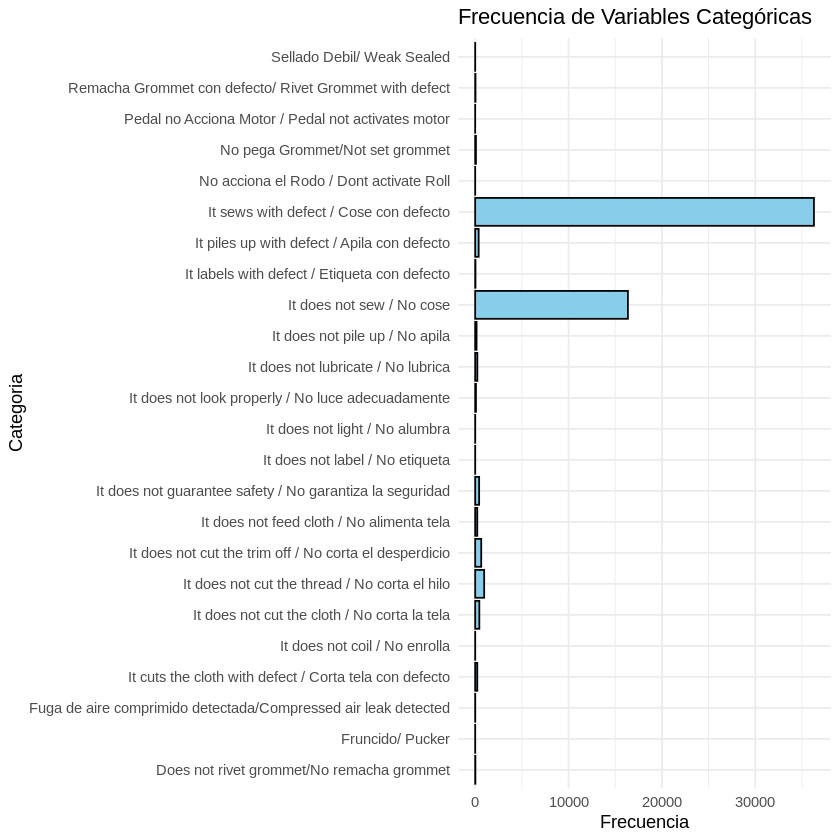

In [53]:
# Crear el gráfico de barras
ggplot(df, aes(y = problem_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

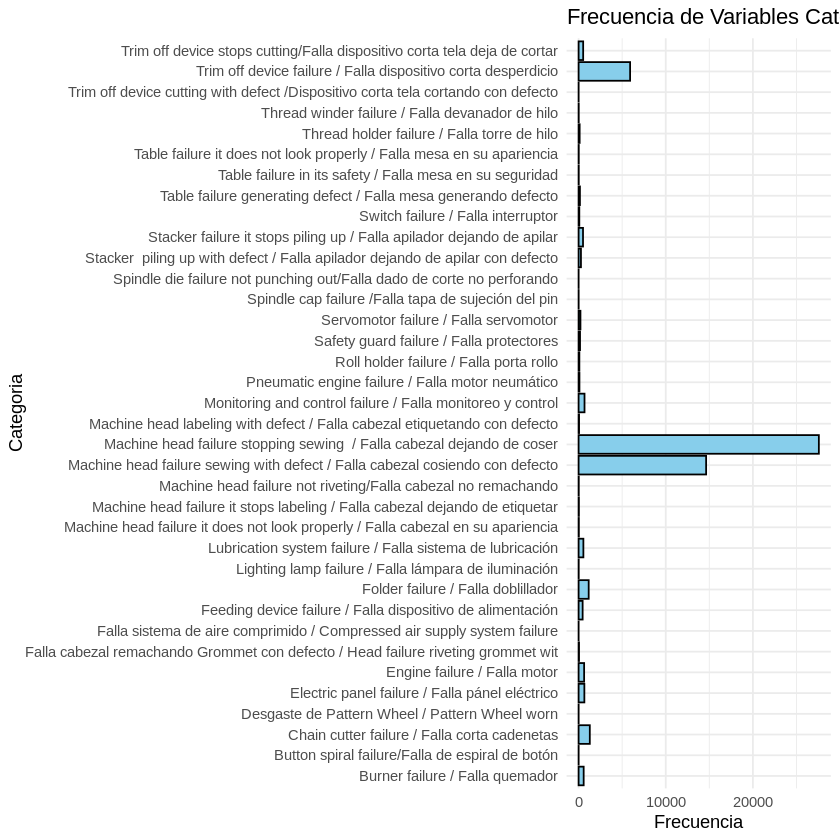

In [54]:
# Crear el gráfico de barras
ggplot(df, aes(y = failure_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

In [55]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
cause_freq <- cause_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
cause_freq

cause_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Misadjusted machine head looper / Enlazador de cabezal desajustado,9529,9529,0.1683390
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,6031,15560,0.2748825
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,4185,19745,0.3488146
Broken machine head ball joint / Rotura de biela de cabezal,4137,23882,0.4218987
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,2589,26471,0.4676359
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,2355,28826,0.5092393
Misadjusted machine head teeth / Dientes de cabezal desajustados,2340,31166,0.5505777
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,1924,33090,0.5845670
Oil leak in machine head / Fuga de aceite lubricante en cabezal,1202,34292,0.6058015


In [56]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
action_freq <- action_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
action_freq

action_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Adjust machine head looper / Ajustar enlazador de cabezal,7561,7561,0.1335724
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,4216,11777,0.2080521
Replace machine head ball joint / Reemplazar biela de cabezal,4168,15945,0.2816839
Adjust machine head teeth / Ajustar dientes de cabezal,3874,19819,0.3501219
Sharpen knife / Afilar cuchillas,3842,23661,0.4179946
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,3100,26761,0.4727591
Adjusted machine head presser foot / Ajustar prensatela de cabezal,2858,29619,0.5232484
Replace machine head looper / Reemplazar enlazador de cabezal,2784,32403,0.5724305
Adjust machine head knife / Ajustar cuchilla de cabezal,1853,34256,0.6051655


In [57]:
# Calcular la frecuencia de acciones correctivas
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
mechanic_freq <- mechanic_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
mechanic_freq

mechanic,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Abel Alberto Ramirez Rivera,378,378,0.006677737
Adalberto Jeremias Rodriguez Zometa,378,756,0.013355475
Antony Ulloa,378,1134,0.020033212
Cain Alfredo Ramirez,378,1512,0.026710949
Carlos Alberto Alfaro Salamanca,378,1890,0.033388687
Carlos De Leon,378,2268,0.040066424
Carlos Israel Linares,378,2646,0.046744161
Cesar Edgardo Ruedas Mendoza,378,3024,0.053421899
DENY RAYMUNDO PUCH POOL,378,3402,0.060099636


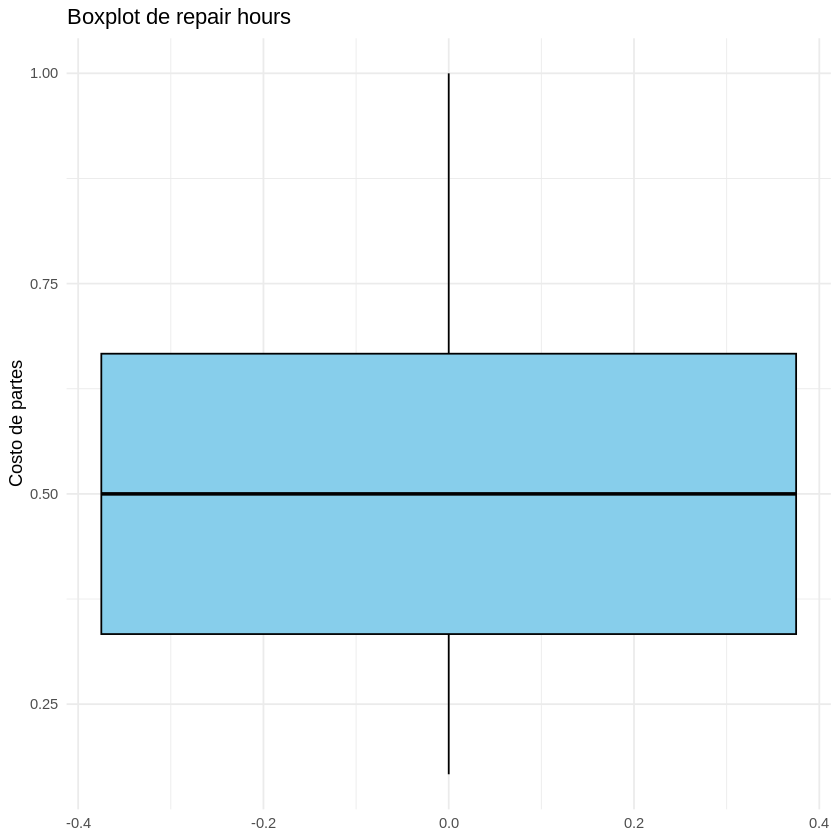

In [58]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de repair hours',
       y = 'Costo de partes') +
  theme_minimal()

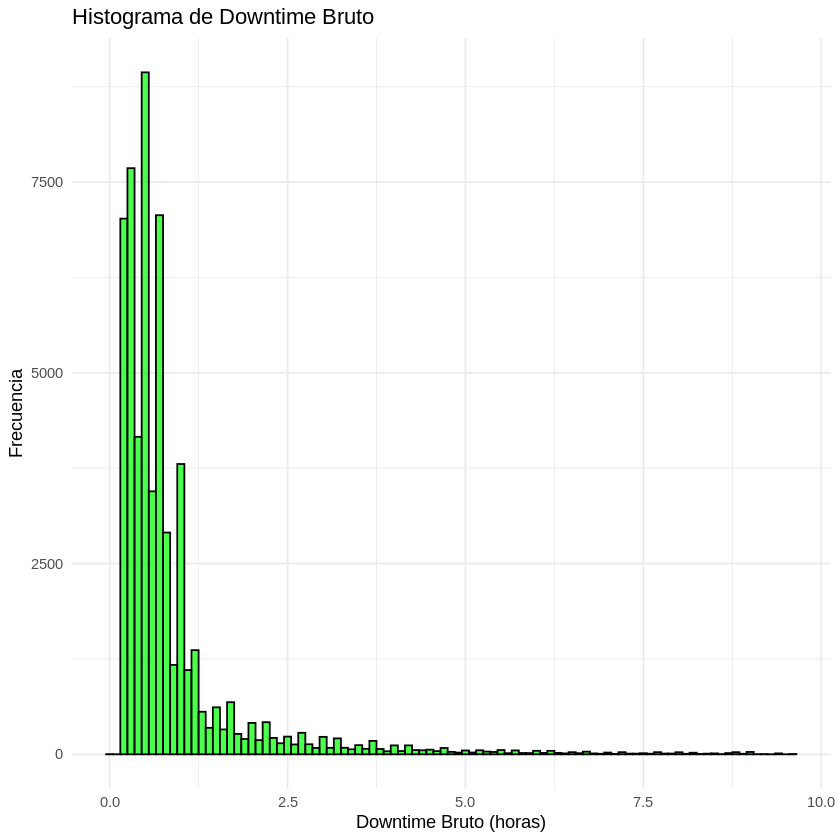

In [59]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (horas)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

**LIMPIEZA DE DATOS**

In [60]:
sapply(df, function(x) sum(is.na(x)))

equipment      operation        wo_type     base_model   problem_code 
             0              0              0              0              0 
  problem_desc   failure_code   failure_desc     cause_code     cause_desc 
             0              0              0              0              0 
   action_code    action_desc       mechanic           date downtime_gross 
             0              0              0              0              0 
  pit_coverage  real_downtime     parts_cost   repair_hours  waiting_hours 
             0              0              0              0              0

In [61]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

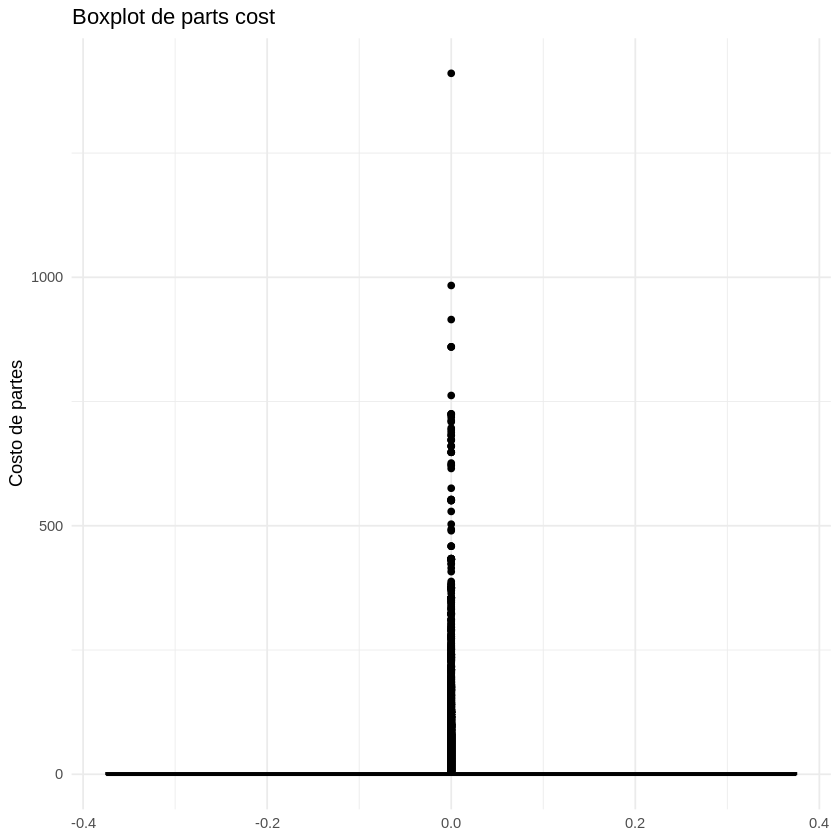

In [62]:
# Crear el boxplot de parts_cost
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo de partes') +
  theme_minimal()

In [63]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [64]:
mean(df$downtime_gross < 0)

[1] 0

In [65]:
# Filtrar registros donde downtimeGross no sea negativo
df_filtered <- df %>%
  filter(downtime_gross >= 0)

In [66]:
mean(df$repair_hours < 0)

[1] 0

In [67]:
# Calcular valor absoluto de repair hours
df$repair_hours <- abs(df$repair_hours)

In [68]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours)

In [69]:
# Calcular la diferencia en días entre la fecha actual y la fecha del último mantenimiento preventivo registrado para cada equipo
df <- df %>%
  group_by(equipment) %>%
  mutate(Time_Since_Last_Preventive_Maintenance = ifelse(`wo_type` == "Preventative Maintenance", difftime(max(date), date, units = "days"), 0))

In [70]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")

In [71]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [72]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

**ANALISIS DE VARIABLE OBJETIVO**

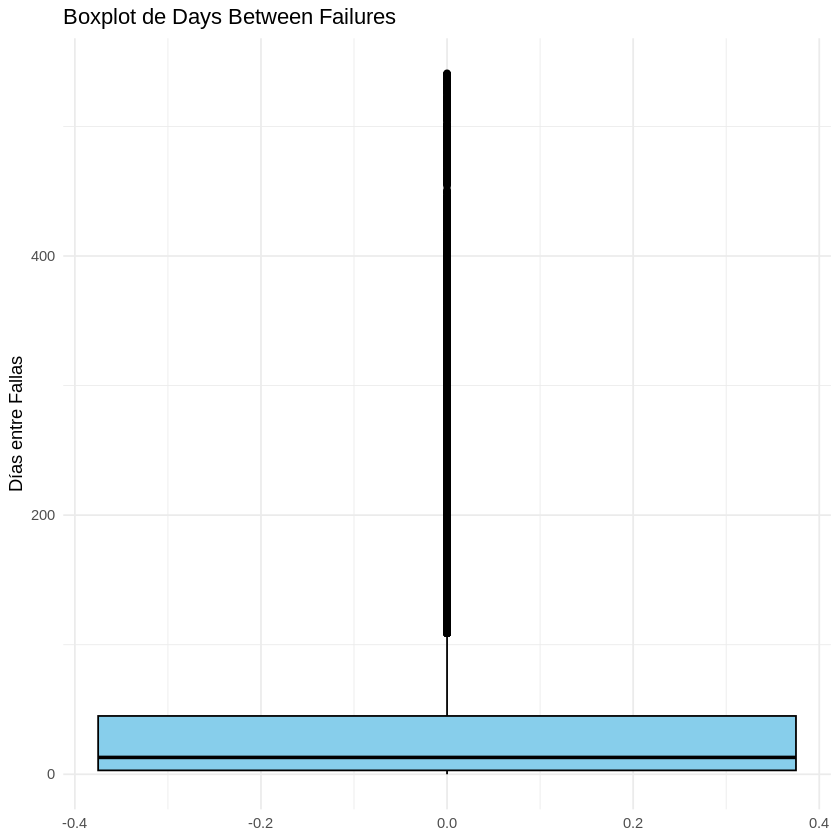

In [73]:
# Crear el boxplot de daysbetween_failures
ggplot(df, aes(y = Days_Between_Failures)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de Days Between Failures',
       y = 'Días entre Fallas') +
  theme_minimal()

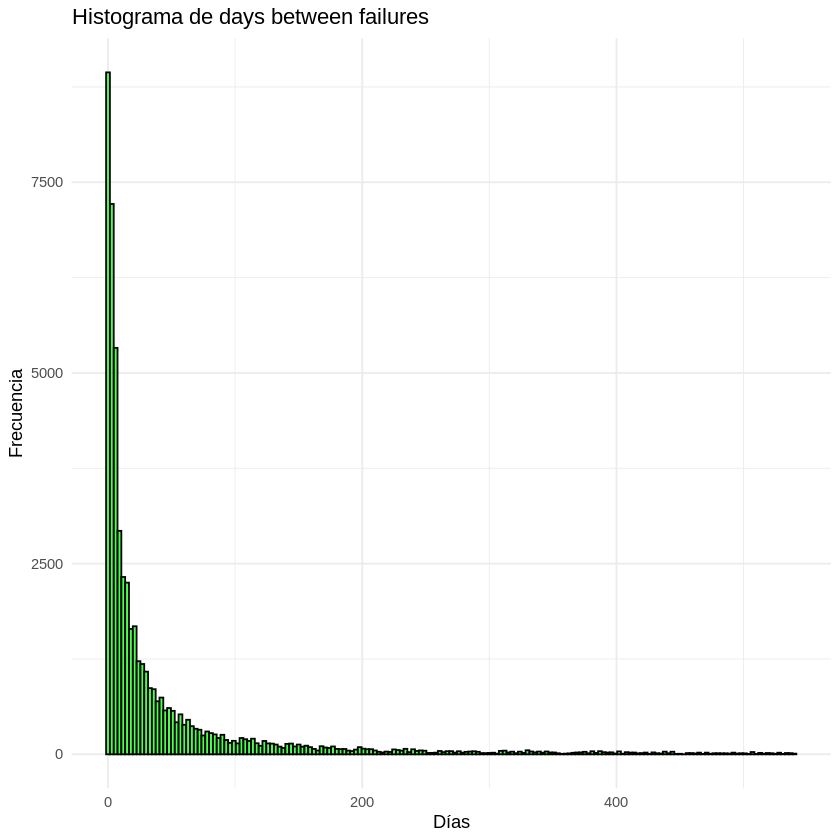

In [74]:
# Histograma de 'Days_Between_Failures'
hist_days_failures <- ggplot(df, aes(x = Days_Between_Failures)) +
  geom_histogram(binwidth = 3, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de days between failures",
       x = "Días",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_days_failures)

**MODELO DE REGRESION LINEAL INICIAL PARA PREDECIR DAYS BETWEEN FAILURES**



In [75]:
df <- select(df, -wo_type, -date)

In [76]:
# Inicializar y ajustar el modelo de regresión lineal
model1 <- lm(Days_Between_Failures~. -equipment -Time_Since_Last_Preventive_Maintenance, data = df)
# Resumen del modelo
summary(model1)


Call:
lm(formula = Days_Between_Failures ~ . - equipment - Time_Since_Last_Preventive_Maintenance, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-278.67  -35.55  -13.44    6.29  513.48 

Coefficients: (23 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   -23.25616
operationBARTACK                                                                               23.01577
operationBIND ARM                                                                              11.43186
operationBIND ARMHOLE                                                                          13.18834
operationBIND LEG                                                                              26.65363
operationBIND NECK                                                                             18.77601
opera

**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [77]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [78]:
# Calcular la mediana de tiempo de reparación
df <- df %>%
  group_by(equipment) %>%
  mutate(Median_Repair_Time = median(repair_hours, na.rm = TRUE))

In [79]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

**MODELO DE REGRESION LINEAL PARA PREDECIR DAYS BETWEEN FAILURES CON MAS VARIABLES**

In [90]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(Days_Between_Failures~. -equipment, data = df)
# Resumen del modelo
summary(model2)


Call:
lm(formula = Days_Between_Failures ~ . - equipment, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-274.49  -35.77  -15.14    9.63  502.97 

Coefficients: (24 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                  -2.829e+01
operationBARTACK                                                                              2.487e+01
operationBIND ARM                                                                             1.033e+01
operationBIND ARMHOLE                                                                         1.158e+01
operationBIND LEG                                                                             2.423e+01
operationBIND NECK                                                                            1.780e+01
operationCLOSE NECK                                

**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [81]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [82]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [83]:
head(df_merged,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,downtime_gross,parts_cost,repair_hours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1083217,JOIN PANEL,FD62,It does not sew / No cose,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head looper / Enlazador de cabezal desajustado,Adjust machine head looper / Ajustar enlazador de cabezal,Omar Maldonado,2.2500000,0.0,1.0000000,0,2,1,0.5000000,0.0,20
1156767,TAPE SHOULDER,J-261,It does not look properly / No luce adecuadamente,Safety guard failure / Falla protectores,Loose engine belt guard / Protector de banda de motor flojo,Tighten engine belt guard screw / Apretar tornillos de protector de banda,WALTER RENE SIERRA VARGAS,0.6666667,8.6,0.6666667,0,2,1,0.6666667,8.6,22
1108020,TAPE SHOULDER,LDA-L26,It does not look properly / No luce adecuadamente,Safety guard failure / Falla protectores,Loose engine belt guard / Protector de banda de motor flojo,Tighten engine belt guard screw / Apretar tornillos de protector de banda,SANCHEZ IMMER ALBERTO,0.5833333,8.6,0.5833333,0,2,1,0.5000000,8.6,22


In [84]:
# Inicializar y ajustar el modelo de regresión lineal
model3 <- lm(Days_Between_Failures~. -equipment, data = df_merged)
# Resumen del modelo
summary(model3)


Call:
lm(formula = Days_Between_Failures ~ . - equipment, data = df_merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-284.01  -33.12  -11.94   12.41  502.42 

Coefficients: (24 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   4.843e+01
operationBARTACK                                                                              3.885e+00
operationBIND ARM                                                                             9.210e+00
operationBIND ARMHOLE                                                                         2.673e+00
operationBIND LEG                                                                             1.054e+01
operationBIND NECK                                                                            5.493e+00
operationCLOSE NECK                         

**MODELO AGREGANDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [85]:
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic")

In [86]:
df_merged2 %>% filter(is.na(antiquity))

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,downtime_gross,parts_cost,repair_hours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age,antiquity
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1020140,JOIN PANEL,FD62,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,GALEAS PEREZ EDWIN ROGELIO,0.8333333,0.00,0.5000000,0,3,1,0.2500000,0.00,24,NA
1138955,FLAT SEAM,LC62D,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,Replace machine head looper / Reemplazar enlazador de cabezal,GALEAS PEREZ EDWIN ROGELIO,1.0000000,30.13,1.0000000,0,5,1,0.5000000,30.13,23,NA
1033663,JOIN PANEL,FD-62,It does not sew / No cose,Machine head failure stopping sewing / Falla cabezal dejando de coser,Broken machine head ball joint / Rotura de biela de cabezal,Replace machine head ball joint / Reemplazar biela de cabezal,GALEAS PEREZ EDWIN ROGELIO,0.6666667,0.00,0.6666667,0,2,2,0.6666667,0.00,24,NA
1046482,HEM AROUND,VC2711,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,GALEAS PEREZ EDWIN ROGELIO,0.1666667,3.40,0.1666667,0,1,5,0.4166667,27.70,23,NA
1104559,ATTACH ELASTIC,VG2735,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head chopper / Cuchilla de cabezal desajustada,Adjust machine head knife / Ajustar cuchilla de cabezal,GALEAS PEREZ EDWIN ROGELIO,2.6666667,0.00,0.9166667,0,3,4,0.5416667,79.50,20,NA
1149220,HEM SLEEVE,VC1700,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Damaged machine head thread take up / Leva de cabezal en mal estado,Polish thread take up / Pulir leva,GALEAS PEREZ EDWIN ROGELIO,0.1666667,0.00,0.1666667,0,22,1,0.4166667,0.00,21,NA
1104550,ATTACH ELASTIC,VG2735,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,GALEAS PEREZ EDWIN ROGELIO,1.0000000,5.56,1.0000000,0,24,1,0.4583333,5.56,23,NA
1160498,FLAT SEAM,LC62D-12,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Misadjusted hook set / Conjunto de garfios mal ajustados,Adjust hook set / Ajustar conjunto de el garfio,GALEAS PEREZ EDWIN ROGELIO,0.7500000,32.00,0.7500000,0,24,1,0.5000000,32.00,20,NA
1020406,HEM SLEEVE,VC2700,It does not sew / No cose,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Thread in poor condition / Hilo en mal estado,Readjust thread parameters / Re ajustar parámetros al hilo,GALEAS PEREZ EDWIN ROGELIO,0.5000000,0.00,0.5000000,0,2,9,0.4166667,52.59,25,NA


In [87]:
head(df_merged2,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,downtime_gross,parts_cost,repair_hours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age,antiquity
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1083217,JOIN PANEL,FD62,It does not sew / No cose,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head looper / Enlazador de cabezal desajustado,Adjust machine head looper / Ajustar enlazador de cabezal,Omar Maldonado,2.2500000,0.0,1.0000000,0,2,1,0.5000000,0.0,20,3
1156767,TAPE SHOULDER,J-261,It does not look properly / No luce adecuadamente,Safety guard failure / Falla protectores,Loose engine belt guard / Protector de banda de motor flojo,Tighten engine belt guard screw / Apretar tornillos de protector de banda,WALTER RENE SIERRA VARGAS,0.6666667,8.6,0.6666667,0,2,1,0.6666667,8.6,22,10
1108020,TAPE SHOULDER,LDA-L26,It does not look properly / No luce adecuadamente,Safety guard failure / Falla protectores,Loose engine belt guard / Protector de banda de motor flojo,Tighten engine belt guard screw / Apretar tornillos de protector de banda,SANCHEZ IMMER ALBERTO,0.5833333,8.6,0.5833333,0,2,1,0.5000000,8.6,22,10


In [88]:
# Inicializar y ajustar el modelo de regresión lineal
model4 <- lm(Days_Between_Failures~. -equipment, data = df_merged2)
# Resumen del modelo
summary(model4)


Call:
lm(formula = Days_Between_Failures ~ . - equipment, data = df_merged2)

Residuals:
    Min      1Q  Median      3Q     Max 
-267.92  -33.05  -11.97   12.39  501.94 

Coefficients: (25 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   6.289e+01
operationBARTACK                                                                              4.190e+00
operationBIND ARM                                                                             8.416e+00
operationBIND ARMHOLE                                                                         2.524e+00
operationBIND LEG                                                                             1.031e+01
operationBIND NECK                                                                            3.980e+00
operationCLOSE NECK                        

**IMPLEMENTACION DE BACKWARD**

In [222]:
sapply(df_merged2, function(x) sum(is.na(x)))

equipment                              operation 
                                     0                                      0 
                            base_model                           problem_desc 
                                     0                                      0 
                          failure_desc                             cause_desc 
                                     0                                      0 
                           action_desc                               mechanic 
                                     0                                      0 
                        downtime_gross                             parts_cost 
                                     0                                      0 
                          repair_hours Time_Since_Last_Preventive_Maintenance 
                                     0                                      0 
                 Days_Between_Failures               Cumulative_Failure_Count 
                                     0                                      0 
                    Median_Repair_Time            Cumulative_Maintenance_Cost 
                                     0                                      0 
                                   Age                              antiquity 
                                     0                                    338

In [ ]:
# Realizar backward elimination
model_final <- step(model4, direction = "backward")
model_final$anova

In [ ]:
formula = as.formula("Days_Between_Failures ~ operation + base_model + mechanic + downtime_gross +
    parts_cost + Cumulative_Failure_Count + Median_Repair_Time +
    Cumulative_Maintenance_Cost + Age")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model5 <- lm(formula = formula, data = df_merged)
# Resumen del modelo
summary(model5)

**ANALISIS DE SUPERVIVENCIA PARA MAQUINARIA DE RUEDO DE MANGA**

In [ ]:
# Cargar datos
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
data <- read_csv(url, show_col_types = FALSE)

In [ ]:
head(data,5)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
data <- data %>%
  filter(`WO Type` == "Corrective Maintenance")
data <- data%>%
  filter(Operation == "HEM SLEEVE")

In [ ]:
# Convertir la columna 'Date' al formato adecuado
data$Date <- as.Date(data$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos

# Ordenar por equipo y fecha
data <- data %>% arrange(Equipment, Date)

# Calcular el tiempo entre fallas y si la falla ocurrió
data <- data %>%
  group_by(Equipment) %>%
  mutate(Previous_Failure_Date = lag(Date),
         Days_Between_Failures = as.numeric(Date - Previous_Failure_Date),
         Event_Occurred = ifelse(is.na(Previous_Failure_Date), 0, 1)) %>%
  ungroup()

# Eliminar filas con NA en 'Days_Between_Failures'
data <- data %>% filter(!is.na(Days_Between_Failures))

In [ ]:
head(data,5)

In [ ]:
# Convertir las variables categóricas a factores
data$Equipment <- as.factor(data$Equipment)
data$Operation <- as.factor(data$Operation)
data$Model.Base <- as.factor(data$`Model Base`)
data$Problem.Code <- as.factor(data$`Problem Code`)
data$Failure.Code <- as.factor(data$`Failure Code`)
data$Cause.Code <- as.factor(data$`Cause Code`)
data$Action.Code <- as.factor(data$`Action Code`)

In [ ]:
cox_model <- coxph(Surv(Days_Between_Failures, Event_Occurred) ~
                  Model.Base + Problem.Code + Failure.Code + Cause.Code +
                   Action.Code + downtimeGross + partsCost +repairHours, data = data)

In [ ]:
# Resumen del modelo
summary(cox_model)

In [ ]:
# Curvas de supervivencia ajustadas
fit <- survfit(cox_model)
ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
           title = "Curvas de Supervivencia Ajustadas",
           xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia")


In [ ]:
# Imprimir el resumen del ajuste para ver la mediana de supervivencia
summary_fit <- summary(fit)
print(summary_fit)

# Obtener la mediana de supervivencia
median_survival <- summary_fit$time[which.min(abs(summary_fit$surv - 0.5))]
print(paste("La mediana de supervivencia es:", median_survival, "días"))

In [ ]:
library(ggplot2)
library(survminer)

# Graficar la curva de supervivencia con la mediana de supervivencia resaltada
plot <- ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
                   title = "Curvas de Supervivencia Ajustadas",
                   xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia",
                   conf.int = TRUE)

# Añadir línea vertical y anotación para la mediana de supervivencia
plot$plot <- plot$plot +
  geom_vline(xintercept = median_survival, linetype = "dashed", color = "red") +
  annotate("text", x = median_survival, y = 0.5, label = paste("Mediana =", median_survival, "días"), vjust = -1, color = "red")

print(plot)